# Overview

**What determines the price of used cars?**

The value of a car drops right from the moment it is bought and the depreciation continues with each passing year. In fact, in the first year itself, the value of a car decreases by 20 percent of its initial value. The make and model of a car, total kilometers driven, overall condition of the vehicle and various other factors further affect the car’s resale value 

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Data Collection

In [2]:
raw_data = pd.read_csv('cars_price.csv')

#Checking the first five rows of the data
raw_data.head()

,Unnamed: 0,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,0,honda,accord,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D
1,1,ford,fusion,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M
2,2,nissan,teana,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D
3,3,volkswagen,fox,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A
4,4,nissan,primera,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D


## Information and Statistical Description about Data

In [3]:
data = raw_data.copy()
data = data.drop('Unnamed: 0', axis = 1)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make                 40000 non-null  object 
 1   model                40000 non-null  object 
 2   priceUSD             40000 non-null  int64  
 3   year                 40000 non-null  int64  
 4   condition            40000 non-null  object 
 5   mileage(kilometers)  40000 non-null  float64
 6   fuel_type            40000 non-null  object 
 7   volume(cm3)          39970 non-null  float64
 8   color                40000 non-null  object 
 9   transmission         40000 non-null  object 
 10  drive_unit           38655 non-null  object 
 11  segment              36245 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 3.7+ MB


In [5]:
# Decriptive statistics about the data
data.describe()

,priceUSD,year,mileage(kilometers),volume(cm3)
count,40000.000000,40000.000000,4.000000e+04,39970.000000
mean,7430.383775,2003.485625,2.434332e+05,2103.201676
std,8338.242134,8.114896,3.167033e+05,938.724653
min,95.000000,1938.000000,0.000000e+00,500.000000
25%,2350.000000,1998.000000,1.370000e+05,1600.000000
50%,5350.000000,2004.000000,2.280000e+05,1995.000000
75%,9850.000000,2010.000000,3.087610e+05,2300.000000
max,195000.000000,2019.000000,9.999999e+06,20000.000000


#####  

## Exploratory Data Analysis (EDA)

In this section, we will try to figure out:
- Relations between different variables, 
- Trends of various features, 
- Relations of different features with our predictive feature(priceUSD) etc.
- Chi-Sqaured Test for categorical variables

#### Price USD and Mileage

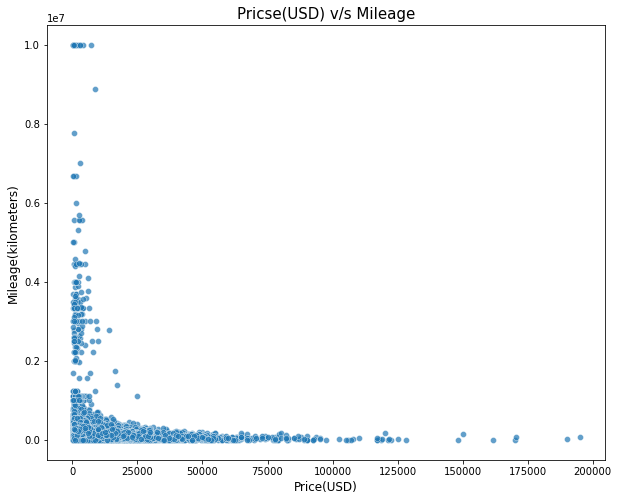

In [6]:
plt.figure(figsize=(10,8))
sns.scatterplot(data = data, x = 'priceUSD', y = 'mileage(kilometers)', alpha=0.7)
plt.title("Pricse(USD) v/s Mileage", fontsize = 15)
plt.xlabel("Price(USD)", fontsize = 12)
plt.ylabel("Mileage(kilometers)", fontsize = 12)
plt.show()

The data is much cluttered towards the origin. 
Even for mileage that are close to zero, the price of some used cars is very high, and vice-vers.
Hence there is some sort of an inverse relation between price of a used card and its mileage.

**Let's find out the relation between price and mileage with respect to fuel type**

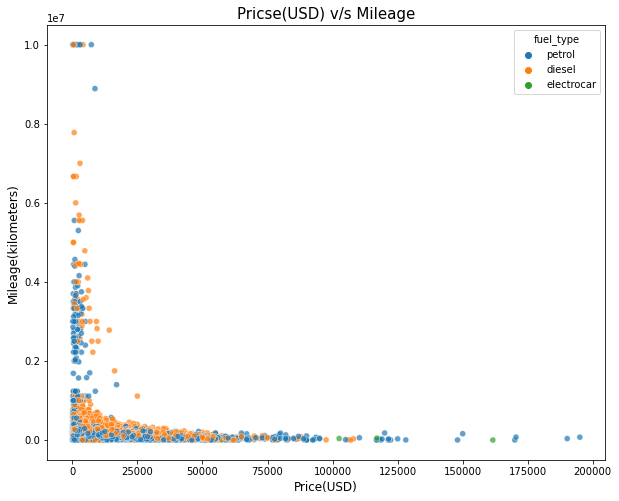

In [7]:
plt.figure(figsize=(10,8))
sns.scatterplot(data = data, x = 'priceUSD', y = 'mileage(kilometers)', alpha=0.7, hue = 'fuel_type')
plt.title("Pricse(USD) v/s Mileage", fontsize = 15)
plt.xlabel("Price(USD)", fontsize = 12)
plt.ylabel("Mileage(kilometers)", fontsize = 12)
plt.show()

Irrespective of the mileage, the price of used electro cars are generally high compared to other cars.

##### 

#### Price USD and Year of manufacture

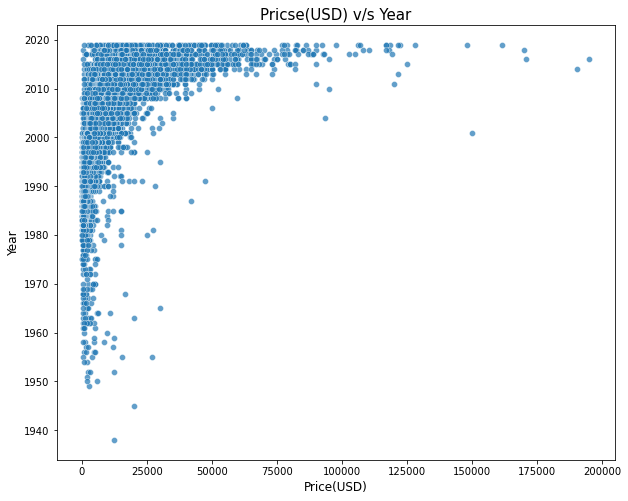

In [8]:
plt.figure(figsize=(10,8))
sns.scatterplot(data = data, x = 'priceUSD', y = 'year', alpha=0.7)
plt.title("Pricse(USD) v/s Year", fontsize = 15)
plt.xlabel("Price(USD)", fontsize = 12)
plt.ylabel("Year", fontsize = 12)
plt.show()

It seems in older days, very few cars were listed for resale. Most of the used cars are listed after 1990, and after 2000, the prices of those cars increased. In further years, it can be assumed that more cars will be listed for resale and their price will also be high.

This means if the car model is quite old, it's price will be comparatively less than the modern cars.

#### Price v/s Volume

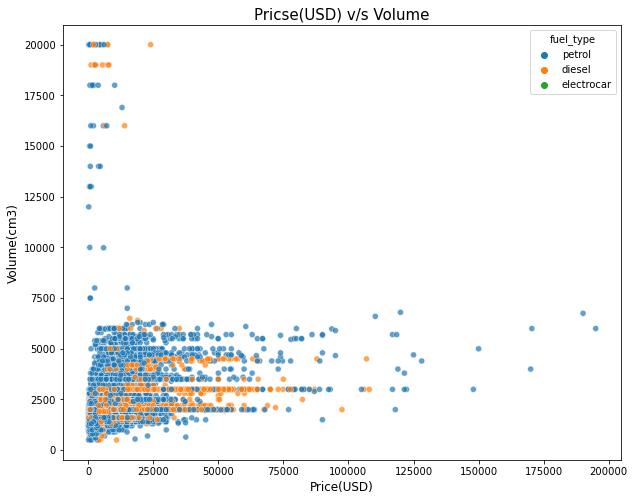

In [9]:
plt.figure(figsize=(10,8))
sns.scatterplot(data = data, x = 'priceUSD', y = 'volume(cm3)', alpha=0.7, hue = 'fuel_type')
plt.title("Pricse(USD) v/s Volume", fontsize = 15)
plt.xlabel("Price(USD)", fontsize = 12)
plt.ylabel("Volume(cm3)", fontsize = 12)
plt.show()

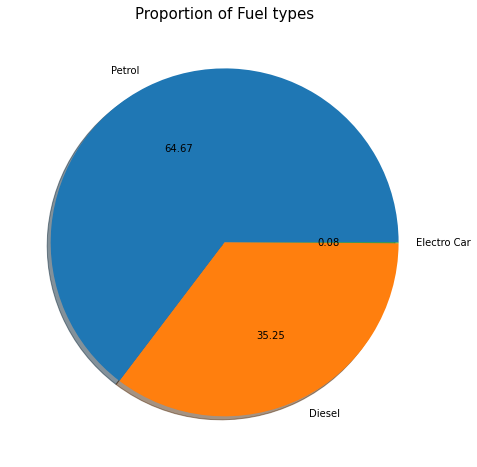

In [10]:
plt.figure(figsize=(8,8))
labels = ["Petrol", "Diesel", "Electro Car"]
plt.pie(data["fuel_type"].value_counts(), autopct= '%.2f', labels = labels ,shadow = True)
plt.title("Proportion of Fuel types", fontsize = 15)
plt.show()

The proportion of Electric Cars is less than 1%. This proves that electric cars are extremely rare and very few are listed for resale.

#####   

**Now let's group the data according to the different segments of the car.** 

In [11]:
data['segment'].unique()

array(['D', 'M', 'A', 'J', 'C', 'E', nan, 'F', 'B', 'S'], dtype=object)

Since there is a nan value, we will remove it in our visualization

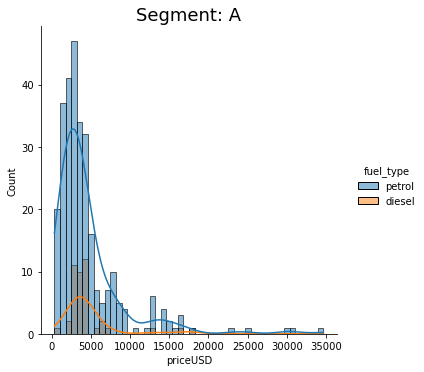

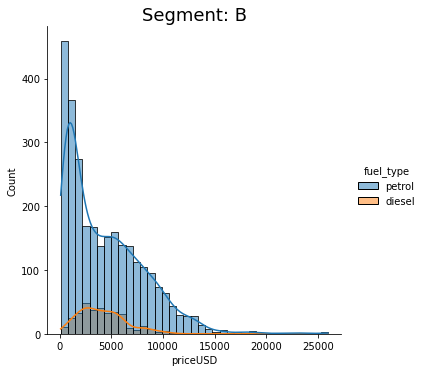

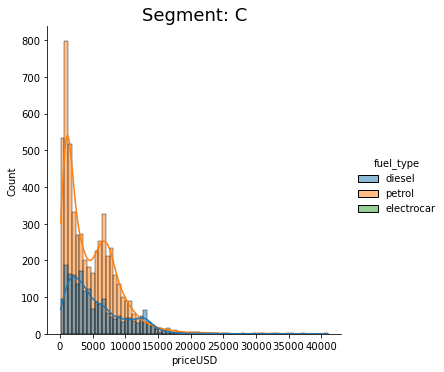

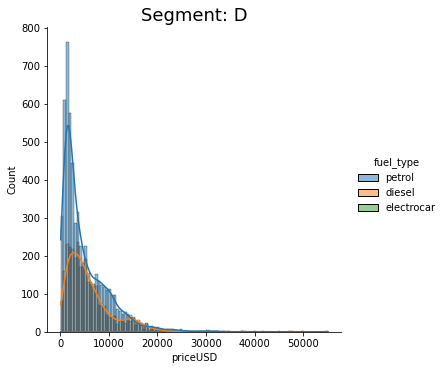

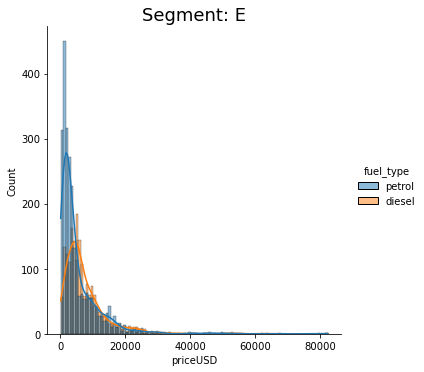

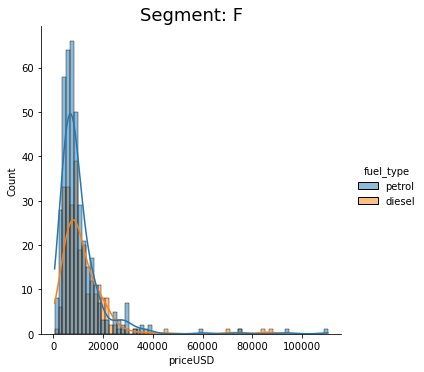

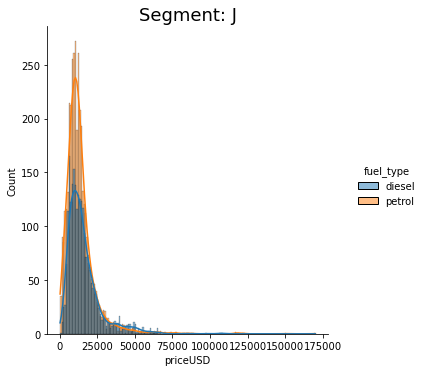

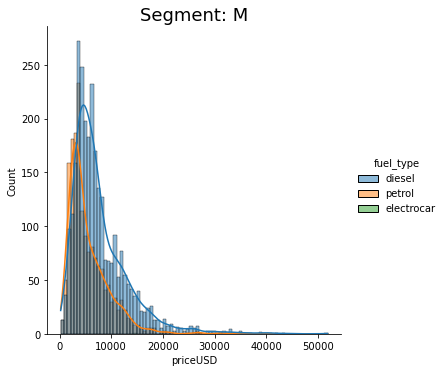

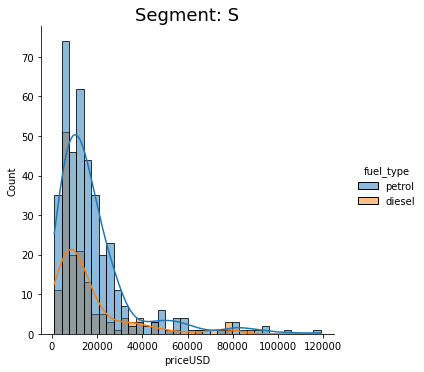

In [12]:
segments = data.groupby('segment') #Grouping the data points according to segments of cars.

segment_names = sorted((data['segment'].dropna()).unique()) #Removing the nan values and sorting according to names

for x in segment_names:
    """
    1. Iterating over the segments,
    2. Grabbing all the features and values under each segment,
    3. Plotting the distribution of Price(USD) for each segment.
    """
    each_segment = segments.get_group(x)
    
    #Plotting price distribution under each segment
    sns.displot(data = each_segment, x = 'priceUSD', hue = 'fuel_type', kde = True)
    plt.title("Segment: " + x, fontsize = 18)
    plt.show()

**A key point to note here is that A,B,E,F,J,S don't have any electro cars listed for resale.**

**The price of cars in each segment is not normally distributed, it is extremely skewed towards left.**

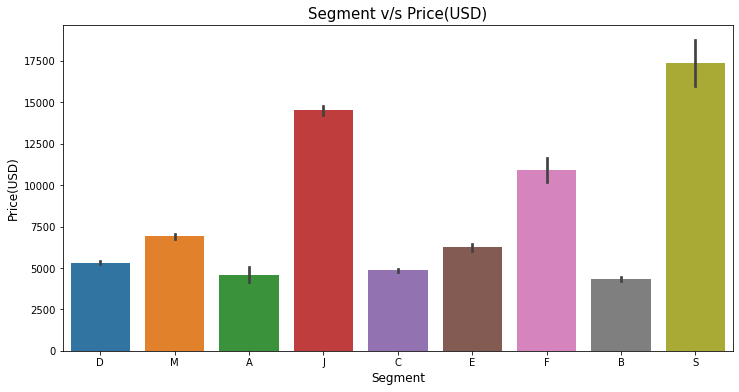

In [13]:
plt.figure(figsize = (12,6))
sns.barplot(data = data, x = 'segment', y = 'priceUSD')
plt.title("Segment v/s Price(USD)", fontsize = 15)
plt.ylabel("Price(USD)", fontsize = 12)
plt.xlabel("Segment", fontsize = 12)
plt.show()

##   

### <u>Chi-Squared test for categorical variables</u>

A chi-square test for independence compares two variables in a contingency table to see if they are related.

This type of test is mainly applied when we have a dataset with categorical variables and we need to find out if there is any significant relation between those two variables or not.

It is represented by the following formula:

Chi-Squared value is the summation of the squared differences of Observed values and Expected values, divided by the Expected values for each variable.

**To perform Chi-Squared test, we will use the stats module from scipy package.**

In [14]:
import scipy.stats as stats
from scipy.stats import chi2


def chi_squared_test(feature_1, feature_2, alpha = 0.05):
    
    """
    1. Create the crosstab of the two features
    2. Calculate the chi-squared value, p-value, degrees of freedom, expected values of the two features, critical value
    3. Check the relation and derive a decision whether to retain or reject the null hypothesis(h0)
    """
     
    #1. Crosstab creates a matrix that contains the count values of the two features.
    #That means it will calculate the values that satisfies both conditions from both features
    cross_tab = pd.crosstab(feature_1, feature_2)
    observed_values = cross_tab.values
    
    #2. The chi_squared value,p-value, degrees of freedom, expected values of the two features can be obtained
    #from the chi2_contigency function from the stats module
    chi2_stats = stats.chi2_contingency(observed_values)
    
    alpha = alpha #Also known as significance level
    chi2_value = chi2_stats[0]
    p_value = chi2_stats[1]
    dof = chi2_stats[2]
    expected_Values = chi2_stats[3]
    
    #Calculate the critical value
    critical_value = chi2.ppf(q = 1 - alpha, df = dof )
    
    
    print("Null Hyposthesis (H0): There is no significant relationship between the two features")
    print("Alternate Hyposthesis (H1): There is a significant relationship between the two features")

    
    print("-------------------------------------------------------------------------------------------------------------------")
    
    print("Chi-Squared value: ", chi2_value)
    print("Critical_value: ", critical_value)
    print("P-value: ", p_value)
    print("Significance level: ", alpha)
    
    print("-------------------------------------------------------------------------------------------------------------------")
    
    
    #3. Checking if we can reject the null hypothesis(h0) and derive a decision
    if chi2_value >= critical_value:
        print("""
        Chi-Squared value is greater than Critical value.
        Hence, we reject the Null Hypothesis. There is a significant relationship between the two variables.
                """)
    else:
        print("""
        Chi-Squared value is less than Critical value.
        Hence, we cannot reject the Null Hypothesis. There is no significant relationship between the two variables.
                """)
        
    if p_value <= alpha:
        print("""
        P-value is less than Significance level.
        Hence, we reject the Null Hypothesis. There is a significant relationship between the two variables.
                """)
    else:
        print("""
        P-value is greater than Significance level.
        Hence, we cannot reject the Null Hypothesis. There is no significant relationship between the two variables.
                """)
        

In [15]:
feature_1 = data['fuel_type']
feature_2 = data['transmission']

print("Chi-Squared Test result: \n")

chi_squared_test(feature_1, feature_2)

Chi-Squared Test result: 

Null Hyposthesis (H0): There is no significant relationship between the two features
Alternate Hyposthesis (H1): There is a significant relationship between the two features
-------------------------------------------------------------------------------------------------------------------
Chi-Squared value:  471.4191646698281
Critical_value:  5.991464547107979
P-value:  4.291697075768914e-103
Significance level:  0.05
-------------------------------------------------------------------------------------------------------------------

        Chi-Squared value is greater than Critical value.
        Hence, we reject the Null Hypothesis. There is a significant relationship between the two variables.
                

        P-value is less than Significance level.
        Hence, we reject the Null Hypothesis. There is a significant relationship between the two variables.
                


#   

### Correlation

We can also find out if different **Numerical features** are correlated with each other.
For that we can use the correlation heatmap.

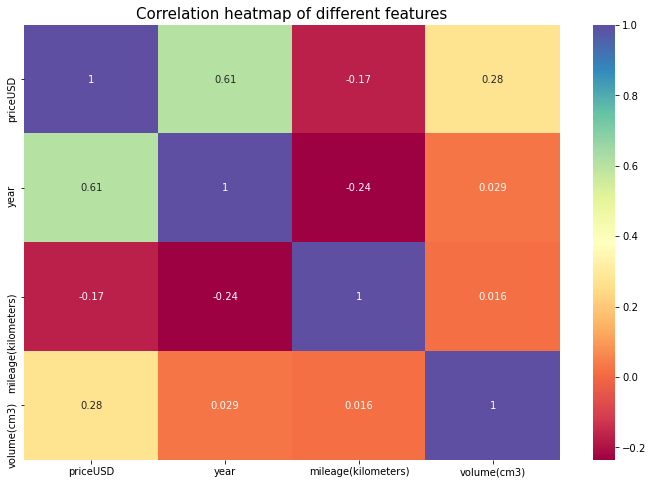

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), cmap = 'Spectral', annot = True)
plt.title("Correlation heatmap of different features", fontsize = 15)
plt.show()

#####   

**Let's see the correlation of the numerical features with the our predictive feature(priceUSD)**

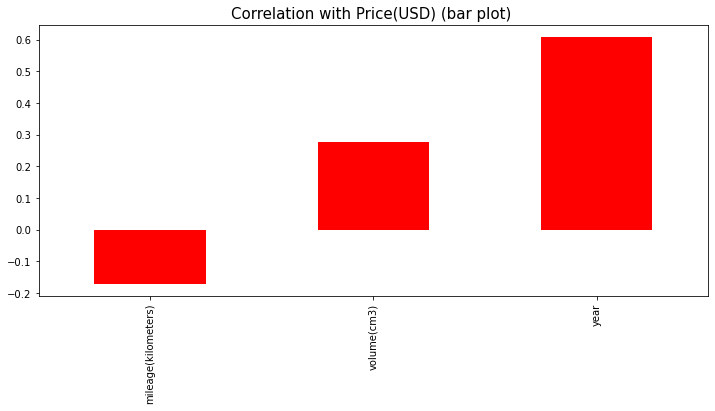

In [17]:
plt.figure(figsize=(12,5))
data.corrwith(data['priceUSD']).sort_values().drop('priceUSD').plot(kind='bar', color = 'red')
plt.title('Correlation with Price(USD) (bar plot) ', fontsize= 15)
plt.show()

Mileage is negatively correlated with price, whereas "year" is highly positively correlated with price.

This is true because we have observed earlier that the price of modern used cars are much higher than old used cars.

######   

#### Key Takeaways:

1. The used cars that are listed for resale after year 2000 (modern cars) have a much higher price than old cars.
2. The price of cars for each segment is not normally distributed, they are skewed towards the left. Hence they are prone to **outliers**.
3. The Chi-Squared test proves that there is a relationship between fuel_type and transmission. They need to be dealt with in Data Preprocessing phase.